In [34]:
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import glob
import cartopy.crs as ccrs

/glade/u/home/njbrodie/.local/lib/python3.10/site-packages/xarray/conventions.py:428: SerializationWarning: variable 'hurs' has multiple fill values {1e+20, 1e+20}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/glade/u/home/njbrodie/.local/lib/python3.10/site-packages/xarray/conventions.py:428: SerializationWarning: variable 'hurs' has multiple fill values {1e+20, 1e+20}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/glade/u/home/njbrodie/.local/lib/python3.10/site-packages/xarray/conventions.py:428: SerializationWarning: variable 'hurs' has multiple fill values {1e+20, 1e+20}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/glade/u/home/njbrodie/.local/lib/python3.10/site-packages/xarray/conventions.py:428: SerializationWarning: variable 'hurs' has multiple fill values {1e+20, 1e+20}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(


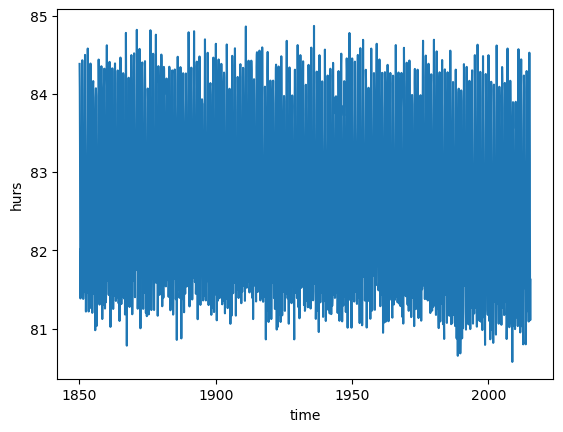

In [19]:
files = glob.glob(f"/glade/collections/cmip/CMIP6/DAMIP/NCAR/CESM2/hist-GHG/r1i1p1f1/Amon/hurs/gn/latest/*.nc")
hurs = xr.open_mfdataset(files)
hurs_timeseries = hurs.mean(['lat', 'lon'])
hurs_timeseries['hurs'].plot()

/glade/u/home/njbrodie/.local/lib/python3.10/site-packages/xarray/conventions.py:428: SerializationWarning: variable 'tas' has multiple fill values {1e+20, 1e+20}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/glade/u/home/njbrodie/.local/lib/python3.10/site-packages/xarray/conventions.py:428: SerializationWarning: variable 'tas' has multiple fill values {1e+20, 1e+20}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/glade/u/home/njbrodie/.local/lib/python3.10/site-packages/xarray/conventions.py:428: SerializationWarning: variable 'tas' has multiple fill values {1e+20, 1e+20}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/glade/u/home/njbrodie/.local/lib/python3.10/site-packages/xarray/conventions.py:428: SerializationWarning: variable 'tas' has multiple fill values {1e+20, 1e+20}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(


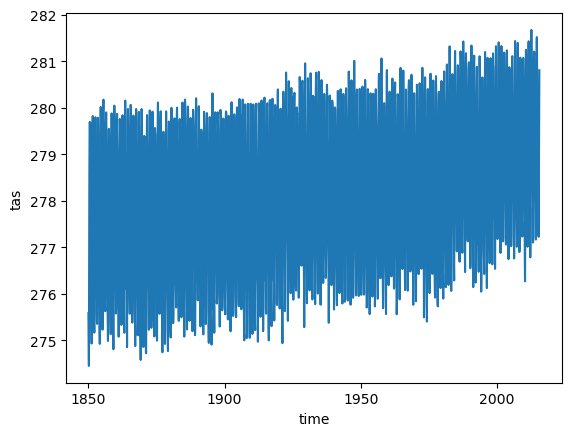

In [20]:
files1 = glob.glob(f"/glade/collections/cmip/CMIP6/DAMIP/NCAR/CESM2/hist-GHG/r1i1p1f1/Amon/tas/gn/latest/*.nc")
tas = xr.open_mfdataset(files1)
tas_timeseries = tas.mean(['lat', 'lon'])
tas_timeseries['tas'].plot()

In [62]:
def ClausiusClapeyron(tas_data):
    numerator = 17.76*tas_data['tas']
    denominator = tas_data['tas'] + 243.5
    svp = .6112 * np.exp(numerator/denominator)
    return svp

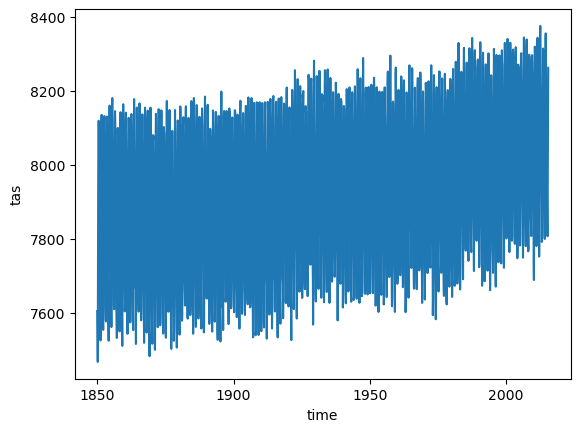

In [63]:
svp1 = ClausiusClapeyron(tas_timeseries)
svp1.plot()

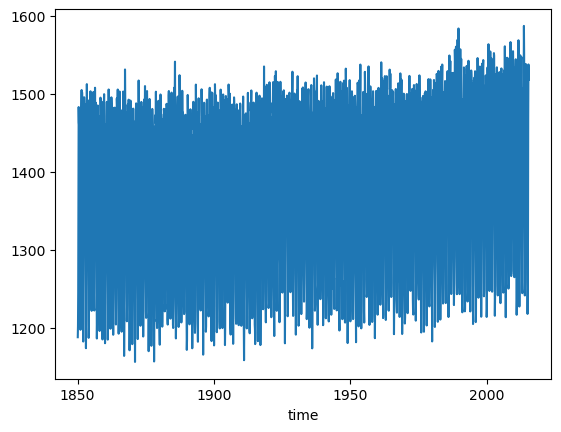

In [55]:
vpd1 = (1 - hurs_timeseries['hurs']/100) * svp1
vpd1.plot()

In [87]:
svp = ClausiusClapeyron(tas)
vpd = ((1-hurs['hurs']/100) * svp)/1000    # /1000 converts to kPa

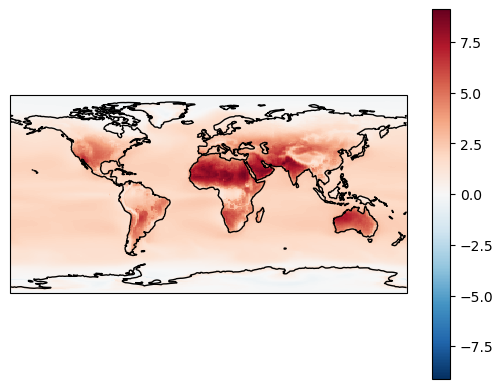

In [98]:
df_1850 = vpd.sel(time=slice('1850','1860')).mean('time')
df_1850.plot(transform=ccrs.PlateCarree(),
                subplot_kws={"projection": ccrs.PlateCarree()}
                                          )
plt.gca().coastlines()

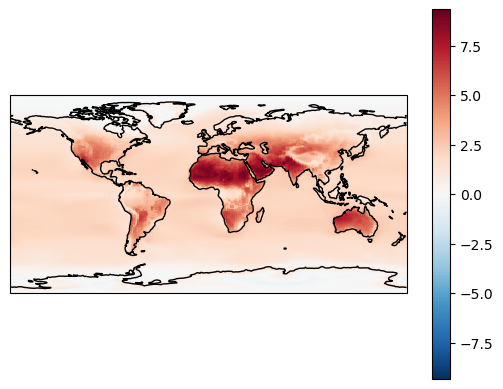

In [99]:
df_2000 = vpd.sel(time=slice('2000','2010')).mean('time')
df_2000.plot(transform=ccrs.PlateCarree(),
                subplot_kws={"projection": ccrs.PlateCarree()}
                                          )
plt.gca().coastlines()

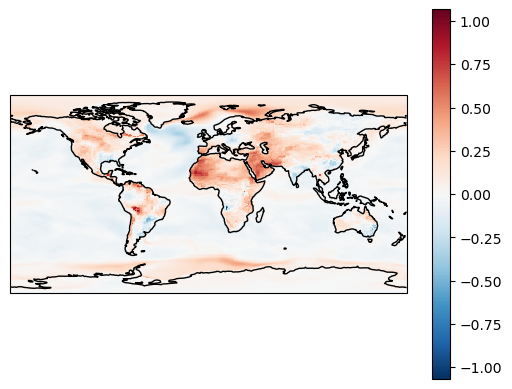

In [101]:
diff_df = df_2000 - df_1850
diff_df.plot(transform=ccrs.PlateCarree(),
                subplot_kws={"projection": ccrs.PlateCarree()}
                                          )
plt.gca().coastlines()